# CAB420, Regression, Additional Example: Regularisation and it's Impact
Dr Simon Denman (s.denman@qut.edu.au)

## Overview
This example is another quick view at regularisation, and how adding a penalty term impacts the learned coefficients, and the model output. For those who are struggling to understand regularisation and what it does, this will hopefully help. What this example will show is:
* For a linear model, we get a coefficient for each term. Some are big, some are small.
* With regularisation, we start to supress those terms. The bigger our penalty term, i.e. the higher our $\lambda$, the more we supress the values. This means:
  * Our coefficients, on the whole, we get smaller
  * The function we learn, will produce flatter results

This example is based somewhat of the second regularised regression example with a couple of key differences:
* We don't compute interaction terms. This makes our model simpler, and easier to visualise
* We're not concerned with finding the best $\lambda$, or even really evaluating our models, we're really just looking at what happens to the model as $\lambda$ changes.

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Lasso, Ridge

## The Data
We're using the corridor travel times data again. And once again, we're pulling out the PM data, and predicting the last series. As noted above, we're not computing interaction terms, so we have a much smaller set of variables. We still have very limited data. Training, validation and testing sets are as per the previous example, and we're still standardising the data.

In [2]:
data = pandas.read_csv('../data/BrisbaneData/CorridorTravelTimes_Merged.csv')
pm_data = data.iloc[:, 20:]
pm_data.head()

,Coronation_Drive_PM,Fairfield_Road_Annerley_Road_PM,Inner_City_Bypass_Eastbound_PM,Inner_City_Bypass_Westbound_PM,Ipswich_Road_Bradfield_Highway_PM,Kelvin_Grove_Road_PM,Kingsford_Smith_Drive_Breakfast_Creek_Road_PM,Logan_Road_PM,Lutwyche_Road_Bowen_Br_Road_PM,Milton_Road_PM,Moggill_Road_PM,Old_Cleveland_Road_PM,Oxley_Road_Coonan_Street_PM,Sandgate_Road_Abbotsford_Road_PM,Stanley_Street__inbound__PM,Vulture_Street__outbound__PM,Waterworks_Road_Musgrave_Road_PM,Wynnum_Road_PM
0,279,726,352,409,1242,451,534,776,456,492,519,633,923,381,589,721.0,882,1220
1,269,682,342,361,1185,422,525,782,427,407,445,588,816,368,530,600.0,844,1129
2,277,649,335,335,1088,423,524,753,442,285,487,555,909,382,592,650.0,804,1121
3,271,680,328,336,1082,433,528,758,417,285,475,562,873,371,534,650.0,790,1114
4,269,646,343,337,1012,414,520,739,394,280,403,538,848,368,558,580.0,764,1015


In [3]:
mu = pm_data.mean()
sigma = pm_data.std()
pm_data_standarsised = (pm_data - mu) / sigma
X = pm_data_standarsised.iloc[:, 0:-1]
Y = pm_data_standarsised.iloc[:, -1]
X = sm.add_constant(X)

In [4]:
train_samples = int(len(X)*0.6)
val_samples = int(len(X)*0.2)
X_train = X.iloc[:train_samples, :]
Y_train = Y.iloc[:train_samples]
X_val = X.iloc[train_samples:(train_samples + val_samples), :]
Y_val = Y.iloc[train_samples:(train_samples + val_samples)]
X_test = X.iloc[(train_samples + val_samples):, :]
Y_test = Y.iloc[(train_samples + val_samples):]

## Linear Model
We'll start with a linear model. We'll learn the model, and then plot:
* A bar chart showing the coefficients, this has no real meaningful value besides being able to see the scale of coefficients a bit easier than if we just printed them to screen (i.e. this is not a meaningful diagnostic plot)
* The performance on the training set
* The performance on the validation set
* The performance on the testing set

What we see is the same as what we saw in the last example, Performance is very good on the training set, pretty good on the validation set, and quite poor on the test set.

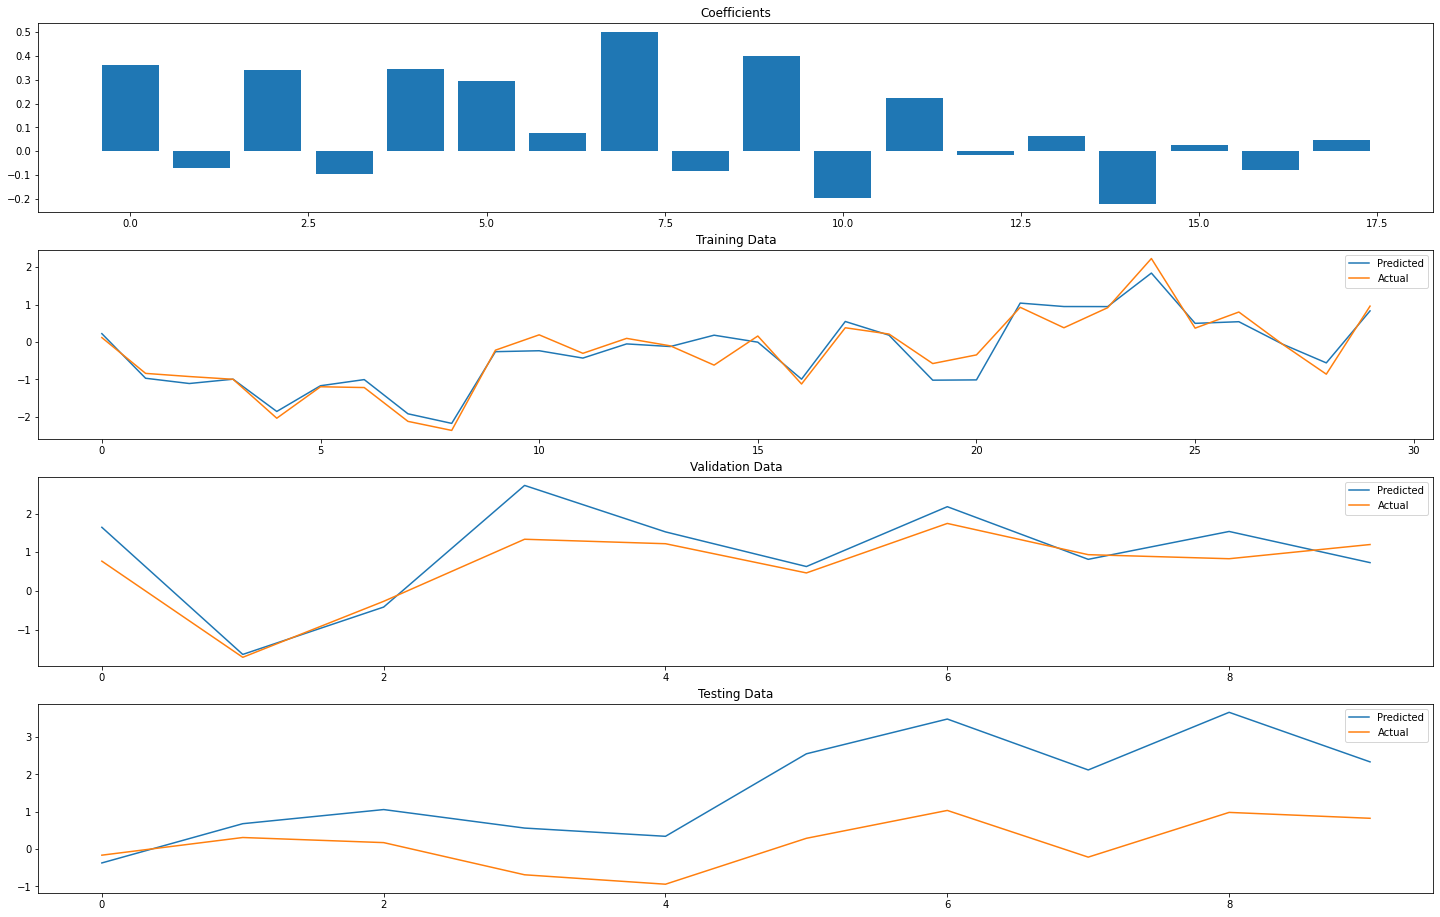

In [5]:
linear = LinearRegression(fit_intercept = False).fit(X = X_train.to_numpy(), y = Y_train.to_numpy())
fig = plt.figure(figsize=[25, 16])
ax = fig.add_subplot(4, 1, 1)
ax.bar(range(len(linear.coef_)), linear.coef_)
ax.set_title('Coefficients')
ax = fig.add_subplot(4, 1, 2)
ax.plot(linear.predict(X_train.values), label='Predicted')
ax.plot(Y_train, label='Actual')
ax.set_title('Training Data')
ax.legend()
ax = fig.add_subplot(4, 1, 3)
ax.plot(linear.predict(X_val.values), label='Predicted')
ax.plot(Y_val.to_numpy(), label='Actual')
ax.set_title('Validation Data')
ax.legend()
ax = fig.add_subplot(4, 1, 4)
ax.plot(linear.predict(X_test.values), label='Predicted')
ax.plot(Y_test.to_numpy(), label='Actual')
ax.set_title('Testing Data')
ax.legend();

## Lasso

Let's now do the same thing to Lasso. This time we'll try three $\lambda$'s:
* a very small value, $\lambda=0.01$
* an intermediate value, $\lambda=0.1$
* a large value, $\lambda=0.5$

We'll compare these to the linear model, considering the same four plots that we had above.

What we see this time is:
* As $\lambda$ increases, our weights get smaller. This does not happen uniformly, i.e. some weights get much smaller much faster. Note also that when we're talking about size, we're concerned with magnitude (i.e. absolute value), not how positive a weight is
* As $\lambda$ increases, our plots get flatter. Consider the $\lambda=0.5$ plots, the prediction values are much more constant. This is becuase the larger $\lambda$ means our coefficients are smaller, so a change in the input results in a smaller change in the output, and our model starts to show less variation.

The reason for this is down to the formulation. If we consider the Lasso formuation we have:

$\sum_{i=1}^{M}(y_i - \hat{y_i})^2 = \sum_{i=1}^{M} \left(y_i - \sum_{j=0}^p w_j \times x_{ij}\right)^2 + \lambda \sum_{j=0}^p |w_j|$

We have two terms, that are trying to do different things, the least-squares term (i.e. the bit from the linear regression equation) is trying to find the line of best fit. The lasso term, i.e. $\lambda \sum_{j=0}^p |w_j|$ is trying to make the weights as small as possible. 

These are somewhat conflicting agendas. If $\lambda$ is very small, we get close to the original linear formulation (and once $\lambda=0$ we have the original linear formulation), and so we see more variation in the outputs, better fit to the training set, and greater risk of overfitting. As $\lambda$ get's bigger, the second term comes to dominate the formulation, and so we see a model whose main aim is to make the weights small. This means that we end up with quite a flat looking plot as the model becomes close to a constant, and for a large enough $\lambda$, the model will infact become a constant.

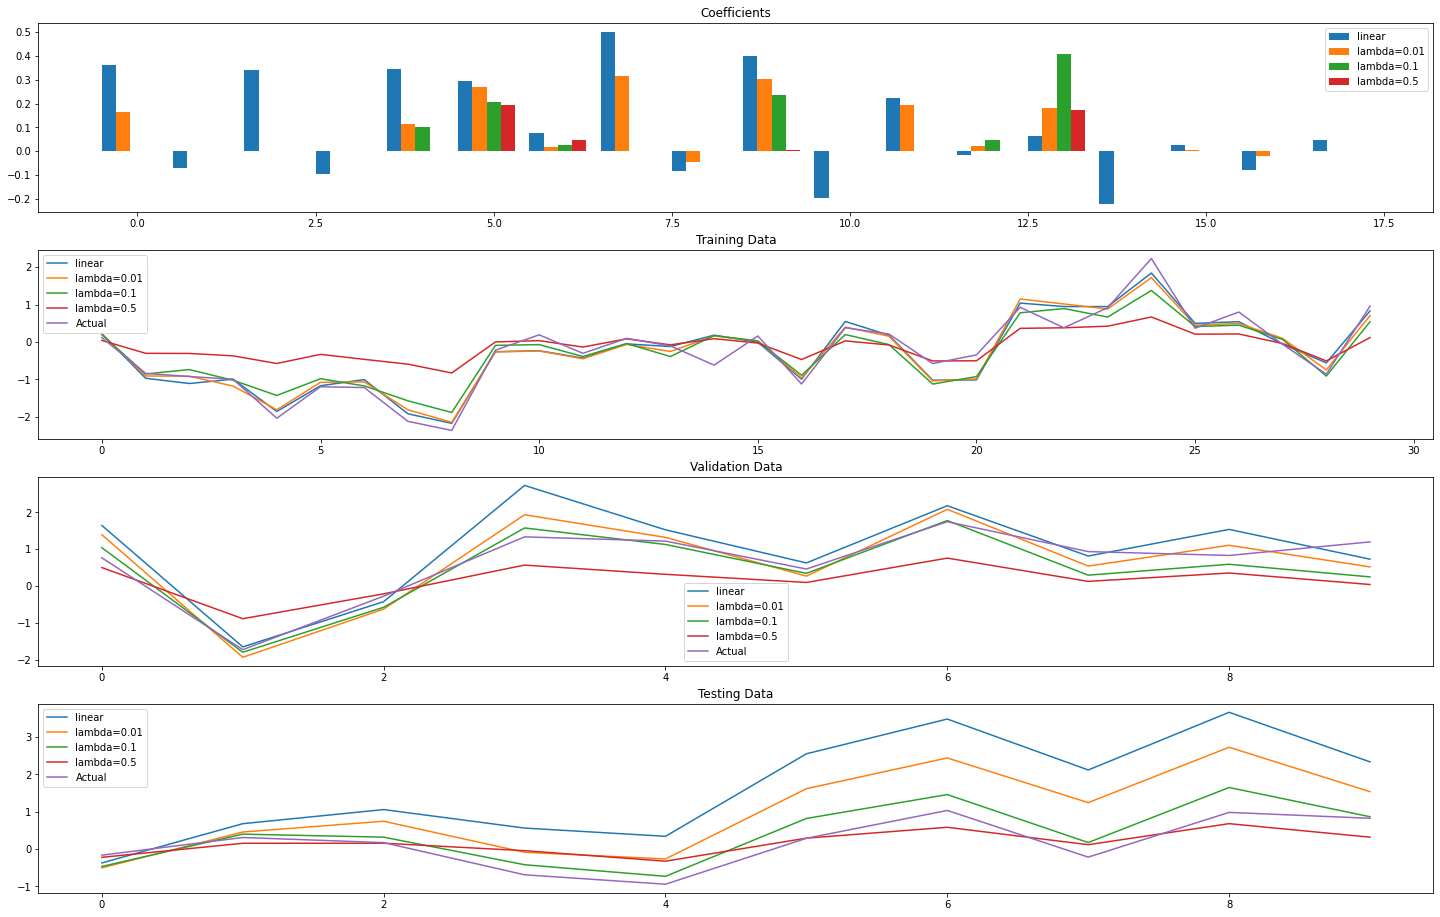

In [6]:
lasso_model_1 = Lasso(fit_intercept=False, alpha=0.01).fit(X = X_train.to_numpy(), y = Y_train.to_numpy())
lasso_model_2 = Lasso(fit_intercept=False, alpha=0.1).fit(X = X_train.to_numpy(), y = Y_train.to_numpy())
lasso_model_3 = Lasso(fit_intercept=False, alpha=0.5).fit(X = X_train.to_numpy(), y = Y_train.to_numpy())

fig = plt.figure(figsize=[25, 16])
ax = fig.add_subplot(4, 1, 1)
w = 0.2
pos = numpy.arange(0, len(linear.coef_), 1)
ax.bar(pos - w*2, linear.coef_, width=w, label='linear')
ax.bar(pos - w, lasso_model_1.coef_, width=w, label='lambda=0.01')
ax.bar(pos, lasso_model_2.coef_, width=w, label='lambda=0.1')
ax.bar(pos + w, lasso_model_3.coef_, width=w, label='lambda=0.5')
ax.legend()
ax.set_title('Coefficients')
ax = fig.add_subplot(4, 1, 2)
ax.plot(linear.predict(X_train.values), label='linear')
ax.plot(lasso_model_1.predict(X_train.values), label='lambda=0.01')
ax.plot(lasso_model_2.predict(X_train.values), label='lambda=0.1')
ax.plot(lasso_model_3.predict(X_train.values), label='lambda=0.5')
ax.plot(Y_train, label='Actual')
ax.set_title('Training Data')
ax.legend()
ax = fig.add_subplot(4, 1, 3)
ax.plot(linear.predict(X_val.values), label='linear')
ax.plot(lasso_model_1.predict(X_val.values), label='lambda=0.01')
ax.plot(lasso_model_2.predict(X_val.values), label='lambda=0.1')
ax.plot(lasso_model_3.predict(X_val.values), label='lambda=0.5')
ax.plot(Y_val.to_numpy(), label='Actual')
ax.set_title('Validation Data')
ax.legend()
ax = fig.add_subplot(4, 1, 4)
ax.plot(linear.predict(X_test.values), label='linear')
ax.plot(lasso_model_1.predict(X_test.values), label='lambda=0.01')
ax.plot(lasso_model_2.predict(X_test.values), label='lambda=0.1')
ax.plot(lasso_model_3.predict(X_test.values), label='lambda=0.5')
ax.plot(Y_test.to_numpy(), label='Actual')
ax.set_title('Testing Data')
ax.legend();

## Ridge Regression

Let's look at ridge regression now. Again, we're doing a similar thing to what we did with Lasso, and this time our $\lambda$'s are:
* a very small value, $\lambda=0.01$
* an intermediate value, $\lambda=2.5$
* a large value, $\lambda=10$

Remember that our ridge formulation is:

$\sum_{i=1}^{M}(y_i - \hat{y_i})^2 = \sum_{i=1}^{M} \left(y_i - \sum_{j=0}^p w_j \times x_{ij}\right)^2 + \lambda \sum_{j=0}^p w_j^2$

i.e. we've swapped out the L1 term for an L2 term. This changes the constraint space such that we can no longer eliminate terms, just make them small.

Looking at our plots, and comparing them to what we say above with Lasso we see that:
* Larger $\lambda$'s will still give lower weights, which is exactly what we expect. However we generally see that the drop is more uniform. Whereas Lasso could drop out terms and have important weights stay unchanged (or even increase) as lambda increased, with Ridge we see a more uniform drop in magnitude (though please note that this is not always the case).
* We see a similar trend in the plots, with a higher $\lambda$ yeilding a flatter curve.

Note that our $\lambda$ values are not necessarily equivilent between the two methods, so making too many comparissons is risky, but hopefully the trends are clear.

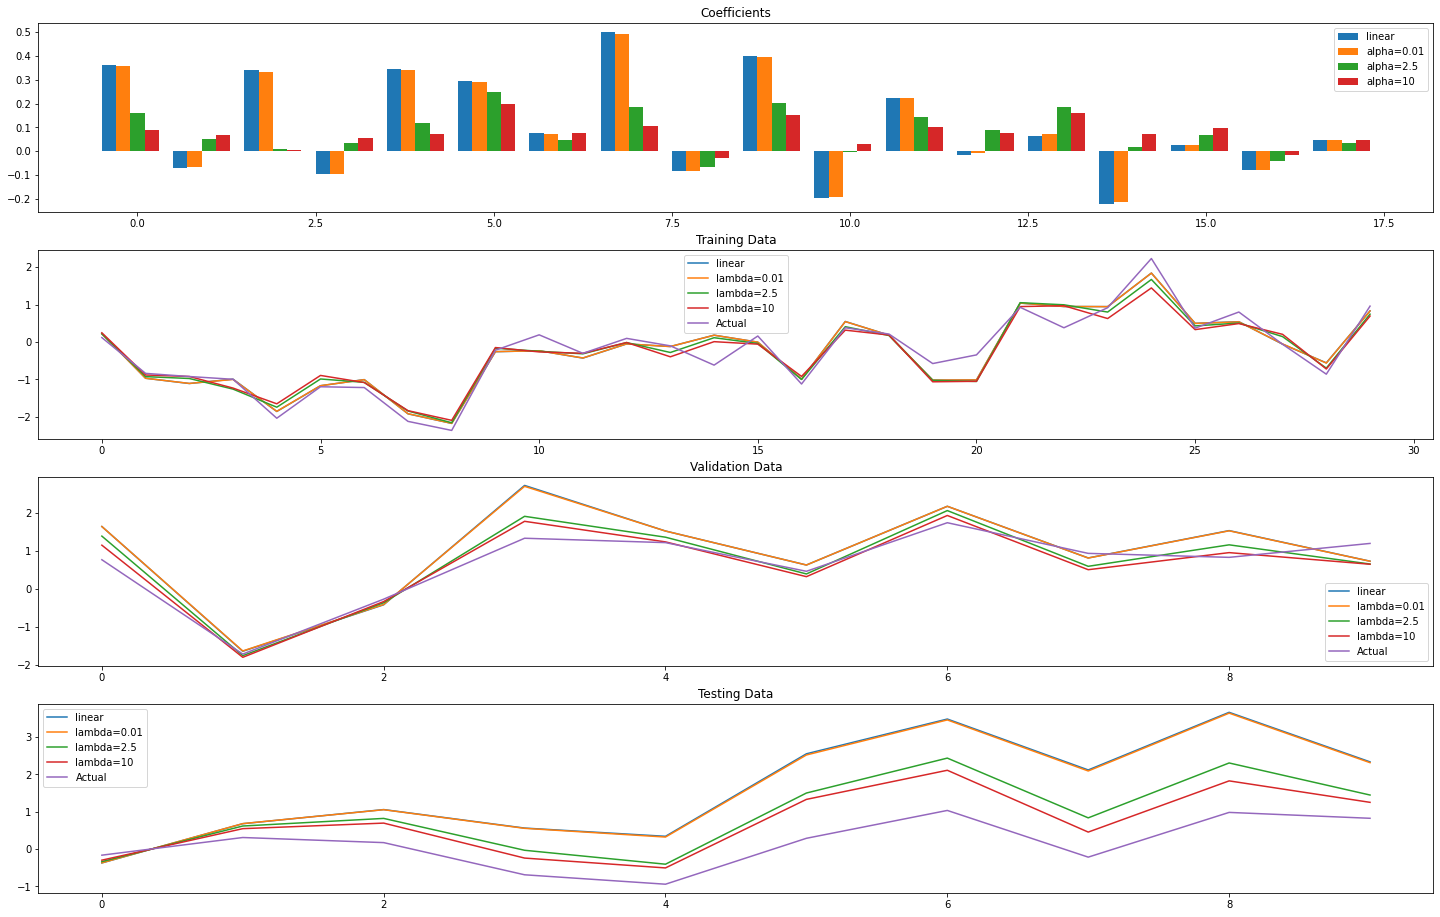

In [7]:
glenn_1 = Ridge(fit_intercept=False, alpha=0.01).fit(X = X_train.to_numpy(), y = Y_train.to_numpy())
glenn_2 = Ridge(fit_intercept=False, alpha=2.5).fit(X = X_train.to_numpy(), y = Y_train.to_numpy())
glenn_3 = Ridge(fit_intercept=False, alpha=10).fit(X = X_train.to_numpy(), y = Y_train.to_numpy())

fig = plt.figure(figsize=[25, 16])
ax = fig.add_subplot(4, 1, 1)
w = 0.2
pos = numpy.arange(0, len(linear.coef_), 1)
ax.bar(pos - w*2, linear.coef_, width=w, label='linear')
ax.bar(pos - w, glenn_1.coef_, width=w, label='alpha=0.01')
ax.bar(pos, glenn_2.coef_, width=w, label='alpha=2.5')
ax.bar(pos + w, glenn_3.coef_, width=w, label='alpha=10')
ax.legend()
ax.set_title('Coefficients')
ax = fig.add_subplot(4, 1, 2)
ax.plot(linear.predict(X_train.values), label='linear')
ax.plot(glenn_1.predict(X_train.values), label='lambda=0.01')
ax.plot(glenn_2.predict(X_train.values), label='lambda=2.5')
ax.plot(glenn_3.predict(X_train.values), label='lambda=10')
ax.plot(Y_train, label='Actual')
ax.set_title('Training Data')
ax.legend()
ax = fig.add_subplot(4, 1, 3)
ax.plot(linear.predict(X_val.values), label='linear')
ax.plot(glenn_1.predict(X_val.values), label='lambda=0.01')
ax.plot(glenn_2.predict(X_val.values), label='lambda=2.5')
ax.plot(glenn_3.predict(X_val.values), label='lambda=10')
ax.plot(Y_val.to_numpy(), label='Actual')
ax.set_title('Validation Data')
ax.legend()
ax = fig.add_subplot(4, 1, 4)
ax.plot(linear.predict(X_test.values), label='linear')
ax.plot(glenn_1.predict(X_test.values), label='lambda=0.01')
ax.plot(glenn_2.predict(X_test.values), label='lambda=2.5')
ax.plot(glenn_3.predict(X_test.values), label='lambda=10')
ax.plot(Y_test.to_numpy(), label='Actual')
ax.set_title('Testing Data')
ax.legend();

## Final Thoughts

This example has sought to explore how $\lambda$ impacts the model, and what this means in terms of the model's sensitivity and the weights that we get out of the regression process. What we can clearly see is that:
* A bigger $\lambda$ means smaller weights on the whole
* A bigger $\lambda$ means the resultant model produces "flatter" predictions, i.e. we get closer to a constant model

This second point comes back to the original intuition that we have about a model, that for a small change in the input we should get a small change in the output. Regularisation provides a way to obtain this, though we need to be careful that we don't make $\lambda$ too big. If we do this, a small change in the input may yield no meaningful change (or no change at all) in the output.

Comparing Lasso and Ridge, we can see a few things:
* An increase in $\lambda$ has a similar impact on the curves, i.e. they get flatter as $\lambda$ gets bigger
* The weights change in different ways:
  * For Lasso, we see that the drop is anything but uniform. Some terms are reduced and go to 0 quickly, others can even increase as $\lambda$ get's bigger
  * For Ridge, the drop tends to be more uniform across the board

It's worth briefly considering why Lasso can allow weights to increase, yet we don't see this as much with Ridge (or if we do, we see much smaller increases). There's no reason they can't increase with Ridge, it's just harder. Ridge uses an L2 term, i.e. the sum of the squares of the weights. An increase in a weight will lead to a big increase in the square of that term, and require a very large decrease in a number of other weights to offset the different. For Lasso, we're concerned with an L1 term, i.e. the sum of absolute values. This means that for an increase in one weight, we just need to offset this with an equivilent decrease elsewhere - basically it's much easier to achieve this.

On the whole, both methods are trying to do the same thing in a very similar way, i.e. penalising large weights in the model. Though the slight difference in formulation, the absolute value vs the squared term, leads to quite a difference in actual behaviour.